# Project: Medical Appointment Data Set Analysis 

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#cleaning">Data Cleaning</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

> The data set is about that if the patient show-up or no-show to the medical appointment. The analysis target is to identify relevant features to show-up or no-show to the appointment.

In [1]:
# load useful packages
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling

> In this section, I will perform check of data integrity of each feature for exmaple checking missing values, inappropriate data types, column lables, abnormal vaules and so on. It's to assure the analysis will be conducted in proper manner without any data noise.

### General Properties

In [2]:
df_noshow = pd.read_csv('noshowappointments.csv')
df_noshow.head(3)

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No


In [3]:
## inspect data typs and column lable
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
# check any missing value or null value
print('Number of Null value: {}'.format(np.sum(df_noshow.isnull().sum())))

Number of Null value: 0


In [5]:
## lowercase column lable for easier operation
df_noshow.columns = map(str.lower, df_noshow.columns)
print(df_noshow.columns)

Index(['patientid', 'appointmentid', 'gender', 'scheduledday',
       'appointmentday', 'age', 'neighbourhood', 'scholarship', 'hipertension',
       'diabetes', 'alcoholism', 'handcap', 'sms_received', 'no-show'],
      dtype='object')


In [6]:
# rename column lable
df_noshow.rename(columns= {'no-show':'no_show'},inplace=True)
# assign proper data type for each column 
df_noshow.patientid = df_noshow.patientid.astype(str)
df_noshow.appointmentid = df_noshow.appointmentid.astype(str)
df_noshow.appointmentday = pd.to_datetime(df_noshow.appointmentday)
df_noshow.scheduledday = pd.to_datetime(df_noshow.scheduledday)
df_noshow.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       110527 non-null  object             
 1   appointmentid   110527 non-null  object             
 2   gender          110527 non-null  object             
 3   scheduledday    110527 non-null  datetime64[ns, UTC]
 4   appointmentday  110527 non-null  datetime64[ns, UTC]
 5   age             110527 non-null  int64              
 6   neighbourhood   110527 non-null  object             
 7   scholarship     110527 non-null  int64              
 8   hipertension    110527 non-null  int64              
 9   diabetes        110527 non-null  int64              
 10  alcoholism      110527 non-null  int64              
 11  handcap         110527 non-null  int64              
 12  sms_received    110527 non-null  int64              
 13  no_show       

In [7]:
# check data integrity of 'gender'
gender_counts = df_noshow['gender'].value_counts();
female_counts = gender_counts['F']
male_counts = gender_counts['M']
print('female_counts = {} '
      'and male_counts = {} \n'
      'total = {}'.format(female_counts,male_counts,np.sum(gender_counts)))


female_counts = 71840 and male_counts = 38687 
total = 110527


In [8]:
# check data integrity of 'scheduledday' vs 'appointmentday'
df_noshow.loc[df_noshow.appointmentday < df_noshow.scheduledday,('scheduledday','appointmentday')];

In [9]:
# check data integrity of 'age'
age_counts = df_noshow['age'].value_counts()
age_counts = age_counts.sort_index()
print(age_counts.head())
print(age_counts.loc[-1])
print(age_counts.loc[0])
age_counts.loc[[0,-1]]  ## use list to slice data

-1       1
 0    3539
 1    2273
 2    1618
 3    1513
Name: age, dtype: int64
1
3539


 0    3539
-1       1
Name: age, dtype: int64

In [10]:
# check data integrity of 'neighbourhood'
neibhood_counts = df_noshow['neighbourhood'].value_counts()
print(neibhood_counts)

JARDIM CAMBURI                 7717
MARIA ORTIZ                    5805
RESISTÊNCIA                    4431
JARDIM DA PENHA                3877
ITARARÉ                        3514
                               ... 
ILHA DO BOI                      35
ILHA DO FRADE                    10
AEROPORTO                         8
ILHAS OCEÂNICAS DE TRINDADE       2
PARQUE INDUSTRIAL                 1
Name: neighbourhood, Length: 81, dtype: int64


In [11]:
# check data integrity of 'scholarship', 0 means No subsidies
scholar_counts = df_noshow['scholarship'].value_counts()
print(scholar_counts)
no_sub_counts = scholar_counts[0]
yes_sub_counts = scholar_counts[1]
print('No_Sub_counts = {} '
      'and Yes_Sub_counts = {} \n'
      'total_subsidies = {}'.format(no_sub_counts,yes_sub_counts,np.sum(scholar_counts)))

0    99666
1    10861
Name: scholarship, dtype: int64
No_Sub_counts = 99666 and Yes_Sub_counts = 10861 
total_subsidies = 110527


In [12]:
# check data integrity of 'hipertension', 0 means No Hipertension
hiper_counts = df_noshow['hipertension'].value_counts()
print(hiper_counts)
no_hiper_counts = hiper_counts[0]
yes_hiper_counts = hiper_counts[1]
print('No_Hipertension_counts = {} '
      'and Yes_Hipertension_counts = {} \n'
      'total_Hipertension = {}'.format(no_hiper_counts,yes_hiper_counts,np.sum(hiper_counts)))

0    88726
1    21801
Name: hipertension, dtype: int64
No_Hipertension_counts = 88726 and Yes_Hipertension_counts = 21801 
total_Hipertension = 110527


In [13]:
# check data integrity of 'diabetes', 0 means No diabetes
diabe_counts = df_noshow['diabetes'].value_counts()
print(diabe_counts)
no_diabe_counts = diabe_counts[0]
yes_diabe_counts = diabe_counts[1]
print('No_diabetes_counts = {} '
      'and Yes_diabetes_counts = {} \n'
      'total_diabetes = {}'.format(no_diabe_counts,yes_diabe_counts,np.sum(diabe_counts)))

0    102584
1      7943
Name: diabetes, dtype: int64
No_diabetes_counts = 102584 and Yes_diabetes_counts = 7943 
total_diabetes = 110527


In [14]:
# check data integrity of 'alcoholism', 0 means No alcoholism
alcoh_counts = df_noshow['alcoholism'].value_counts()
print(alcoh_counts)
no_alcoh_counts = alcoh_counts[0]
yes_alcoh_counts = alcoh_counts[1]
print('No_alcoholism_counts = {} '
      'and Yes_alcoholism_counts = {} \n'
      'total_alcoholism = {}'.format(no_alcoh_counts,yes_alcoh_counts,np.sum(alcoh_counts)))

0    107167
1      3360
Name: alcoholism, dtype: int64
No_alcoholism_counts = 107167 and Yes_alcoholism_counts = 3360 
total_alcoholism = 110527


In [15]:
# check data integrity of 'handcap', 
handcap_counts = df_noshow['handcap'].value_counts()
print(handcap_counts)
## check with mentor/forum

0    108286
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64


In [16]:
# check data integrity of 'sms_received', 
sms_counts = df_noshow['sms_received'].value_counts()
print(sms_counts)
no_sms_counts = sms_counts[0]
yes_sms_counts = sms_counts[1]
print('No_sms_counts = {} '
      'and Yes_sms_counts = {} \n'
      'total_sms = {}'.format(no_sms_counts,yes_sms_counts,np.sum(sms_counts)))

0    75045
1    35482
Name: sms_received, dtype: int64
No_sms_counts = 75045 and Yes_sms_counts = 35482 
total_sms = 110527


In [17]:
# check data integrity of 'no_show', 
show_counts = df_noshow['no_show'].value_counts()
print(show_counts)
no_show_counts = show_counts['Yes'] ## yes means No Show
yes_show_counts = show_counts['No']
print('No_show_counts = {} '
      'and Yes_show_counts = {} \n'
      'total_show = {}'.format(no_show_counts,yes_show_counts,np.sum(show_counts)))

No     88208
Yes    22319
Name: no_show, dtype: int64
No_show_counts = 22319 and Yes_show_counts = 88208 
total_show = 110527


In [18]:
df_noshow_clean = df_noshow.copy()

<a id='cleaning'></a>
## Data Cleaning

> In this section, I will start to clean up the data set according to previous observation. Only the 'age' column has abnormal values so i will remove those records associated with unreasonable age such as 0 and -1. New data set will be created for further analysis.

### General Properties

In [19]:
## drop age = [-1,0]
drop_age_index = df_noshow_clean[df_noshow_clean['age'].isin([-1,0])].index
#print(drop_age_index)
df_noshow_clean.drop(index=drop_age_index,inplace=True)

In [20]:
df_noshow_clean['no_show']

0         No
1         No
2         No
3         No
4         No
          ..
110522    No
110523    No
110524    No
110525    No
110526    No
Name: no_show, Length: 106987, dtype: object

In [21]:
df_noshow_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 106987 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   patientid       106987 non-null  object             
 1   appointmentid   106987 non-null  object             
 2   gender          106987 non-null  object             
 3   scheduledday    106987 non-null  datetime64[ns, UTC]
 4   appointmentday  106987 non-null  datetime64[ns, UTC]
 5   age             106987 non-null  int64              
 6   neighbourhood   106987 non-null  object             
 7   scholarship     106987 non-null  int64              
 8   hipertension    106987 non-null  int64              
 9   diabetes        106987 non-null  int64              
 10  alcoholism      106987 non-null  int64              
 11  handcap         106987 non-null  int64              
 12  sms_received    106987 non-null  int64              
 13  no_show       

In [22]:
## get basic info of dataset
total_record= df_noshow_clean.shape[0]
print(total_record)
num_of_noshow = np.sum(df_noshow_clean['no_show']=='Yes')
print(num_of_noshow)
avg_no_show_percent = num_of_noshow/total_record
print(avg_no_show_percent)

106987
21680
0.20264144241823773


<a id='eda'></a>
## Exploratory Data Analysis

> In this section, I will ask some questions about the data set and try to explore it by using numerical calculation and some visualization tools. During the process, i expect to get some insights of data and observe key patterns which patients will show or not show up in the scheduled appointment.   

### Research Question 1 : What factors could lead to higher chance when patient will not show up for scheduled appointment?

> *Gender*: within No_showup group, the male has 7405 patients and female has 14275 patients.

gender
F    14275
M     7405
Name: no_show, dtype: int64


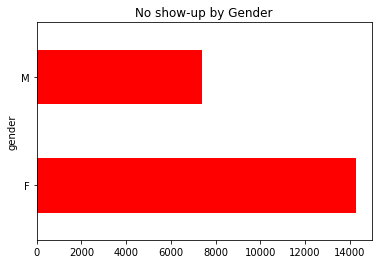

In [23]:
showup_gender_gpo = df_noshow_clean.groupby(['no_show','gender'])['no_show'].count()
print(showup_gender_gpo['Yes'])
showup_gender_gpo['Yes'].plot.barh(title='No show-up by Gender',color='r');


> *Scholarship*: within No_showup group, if patient joins scholarship, number of not shown up comes to 2571. 

scholarship
0    19109
1     2571
Name: no_show, dtype: int64


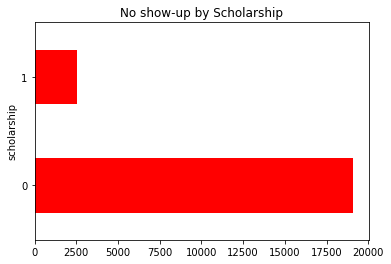

In [24]:
showup_scholarship_gpo = df_noshow_clean.groupby(['no_show','scholarship'])['no_show'].count()
print(showup_scholarship_gpo['Yes'])
showup_scholarship_gpo['Yes'].plot.barh(title='No show-up by Scholarship',color='r');


> *Hipertension*: within No_showup group, if patient has hipertension, number of not shown up comes to 3772. 

hipertension
0    17908
1     3772
Name: no_show, dtype: int64


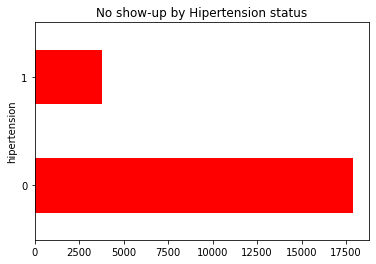

In [25]:
showup_hipertension_gpo = df_noshow_clean.groupby(['no_show','hipertension'])['no_show'].count()
print(showup_hipertension_gpo['Yes'])
showup_hipertension_gpo['Yes'].plot.barh(title='No show-up by Hipertension status',color='r');


> *Diabetes*: within No_showup group, if patient has diabetes, number of not shown up comes to 1430. 

diabetes
0    20250
1     1430
Name: no_show, dtype: int64


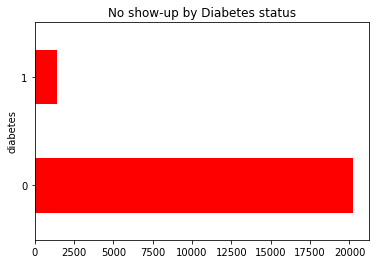

In [26]:
showup_diabetes_gpo = df_noshow_clean.groupby(['no_show','diabetes'])['no_show'].count()
print(showup_diabetes_gpo['Yes'])
showup_diabetes_gpo['Yes'].plot.barh(title='No show-up by Diabetes status',color='r');

> *SMS_received*: within No_showup group, if patient has diabetes, number of not shown up comes to 9568. 

sms_received
0    12112
1     9568
Name: no_show, dtype: int64


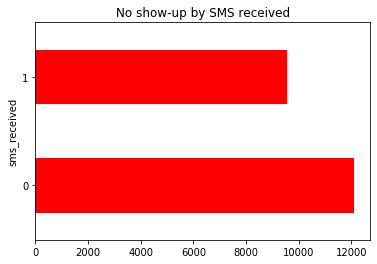

In [27]:
showup_sms_gpo = df_noshow_clean.groupby(['no_show','sms_received'])['no_show'].count()
print(showup_sms_gpo['Yes'])
showup_sms_gpo['Yes'].plot.barh(title='No show-up by SMS received',color='r');

gender  no_show
F       No         55843
        Yes        14275
M       No         29464
        Yes         7405
Name: no_show, dtype: int64


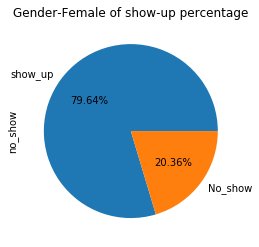

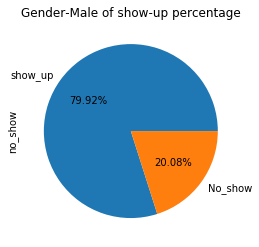

In [28]:
gender_gpo = df_noshow_clean.groupby(['gender','no_show'])['no_show'].count()
print(gender_gpo)
gender_gpo_female=gender_gpo['F']
gender_gpo_male=gender_gpo['M']

gender_gpo_female.plot(kind='pie',labels=['show_up','No_show'],autopct='%1.2f%%',
                       title='Gender-Female of show-up percentage');
plt.show()
gender_gpo_male.plot(kind='pie',labels=['show_up','No_show'],autopct='%1.2f%%',
                     title='Gender-Male of show-up percentage');
plt.show()


scholarship  no_show
0            No         77069
             Yes        19109
1            No          8238
             Yes         2571
Name: no_show, dtype: int64
no_show
No     0.801316
Yes    0.198684
Name: no_show, dtype: float64
no_show
No     0.762143
Yes    0.237857
Name: no_show, dtype: float64


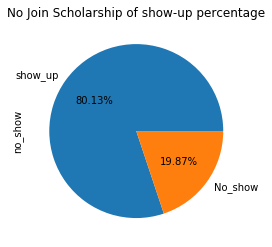

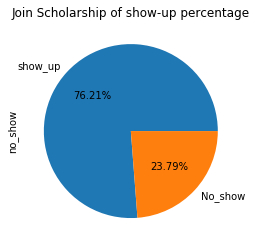

In [29]:
scholarship_gpo = df_noshow_clean.groupby(['scholarship','no_show'])['no_show'].count()
print(scholarship_gpo)

sch_gpo_0=scholarship_gpo[0]
sch_gpo_1=scholarship_gpo[1]
print(sch_gpo_0/np.sum(sch_gpo_0))### higher yes_show
print(sch_gpo_1/np.sum(sch_gpo_1))### higher no_show

sch_gpo_0.plot(kind='pie',labels=['show_up','No_show'],autopct='%1.2f%%',
                       title='No Join Scholarship of show-up percentage');
plt.show()
sch_gpo_1.plot(kind='pie',labels=['show_up','No_show'],autopct='%1.2f%%',
                     title='Join Scholarship of show-up percentage');
plt.show()

#scholarship_gpo['Yes'].plot.bar();

hipertension  no_show
0             No         67278
              Yes        17908
1             No         18029
              Yes         3772
Name: no_show, dtype: int64
no_show
No     0.789778
Yes    0.210222
Name: no_show, dtype: float64
no_show
No     0.82698
Yes    0.17302
Name: no_show, dtype: float64


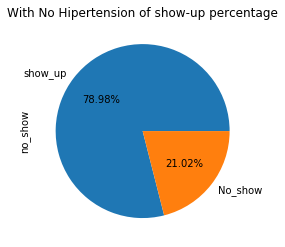

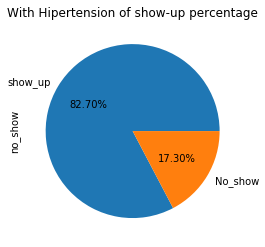

In [30]:
hipertension_gpo = df_noshow_clean.groupby(['hipertension','no_show'])['no_show'].count()
print(hipertension_gpo)

hiper_gpo_0=hipertension_gpo[0]
hiper_gpo_1=hipertension_gpo[1]
print(hiper_gpo_0/np.sum(hiper_gpo_0))
print(hiper_gpo_1/np.sum(hiper_gpo_1))## lower no_show

hiper_gpo_0.plot(kind='pie',labels=['show_up','No_show'],autopct='%1.2f%%',
                       title='With No Hipertension of show-up percentage');
plt.show()
hiper_gpo_1.plot(kind='pie',labels=['show_up','No_show'],autopct='%1.2f%%',
                     title='With Hipertension of show-up percentage');
plt.show()

diabetes  no_show
0         No         78794
          Yes        20250
1         No          6513
          Yes         1430
Name: no_show, dtype: int64
no_show
No     0.795545
Yes    0.204455
Name: no_show, dtype: float64
no_show
No     0.819967
Yes    0.180033
Name: no_show, dtype: float64


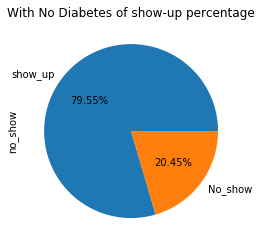

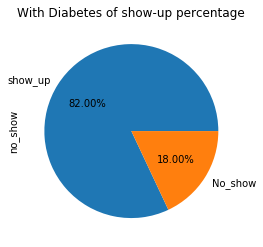

In [31]:
diabetes_gpo = df_noshow_clean.groupby(['diabetes','no_show'])['no_show'].count()
print(diabetes_gpo)

diab_gpo_0=diabetes_gpo[0]
diab_gpo_1=diabetes_gpo[1]
print(diab_gpo_0/np.sum(diab_gpo_0)) ## higher no_show
print(diab_gpo_1/np.sum(diab_gpo_1))## ## lower no_show

diab_gpo_0.plot(kind='pie',labels=['show_up','No_show'],autopct='%1.2f%%',
                       title='With No Diabetes of show-up percentage');
plt.show()
diab_gpo_1.plot(kind='pie',labels=['show_up','No_show'],autopct='%1.2f%%',
                     title='With Diabetes of show-up percentage');
plt.show()

sms_received  no_show
0             No         60290
              Yes        12112
1             No         25017
              Yes         9568
Name: no_show, dtype: int64
no_show
No     0.832712
Yes    0.167288
Name: no_show, dtype: float64
no_show
No     0.723348
Yes    0.276652
Name: no_show, dtype: float64


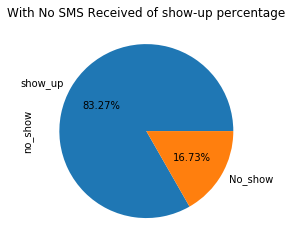

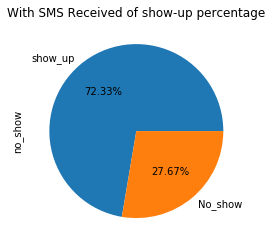

In [32]:
sms_gpo = df_noshow_clean.groupby(['sms_received','no_show'])['no_show'].count()
print(sms_gpo)

sms_gpo_0=sms_gpo[0]
sms_gpo_1=sms_gpo[1]
print(sms_gpo_0/np.sum(sms_gpo_0)) ## lower no_show
print(sms_gpo_1/np.sum(sms_gpo_1))## ## higher no_show

sms_gpo_0.plot(kind='pie',labels=['show_up','No_show'],autopct='%1.2f%%',
                       title='With No SMS Received of show-up percentage');
plt.show()
sms_gpo_1.plot(kind='pie',labels=['show_up','No_show'],autopct='%1.2f%%',
                     title='With SMS Received of show-up percentage');
plt.show()

### Research Question 2: Does the elder have less chance of not showing up schedule appointment?

In [33]:
df_noshow_clean['age_class']=pd.cut(df_noshow_clean['age'],bins=[0,20,40,60,120],labels=['0-20','20-40','40-60','>60'])
age_class_gpo = df_noshow_clean.groupby(['age_class','no_show'])['no_show'].count()
print(age_class_gpo)
## count number of patient which doesn't show up by age group
age_class_no_show=[]
age_class_no_show.append(age_class_gpo[('0-20','Yes')]/age_class_gpo['0-20'].sum())
age_class_no_show.append(age_class_gpo[('20-40','Yes')]/age_class_gpo['20-40'].sum())
age_class_no_show.append(age_class_gpo[('40-60','Yes')]/age_class_gpo['40-60'].sum())
age_class_no_show.append(age_class_gpo[('>60','Yes')]/age_class_gpo['>60'].sum())

age_class  no_show
0-20       No         21852
           Yes         6457
20-40      No         22209
           Yes         6626
40-60      No         24490
           Yes         5591
>60        No         16756
           Yes         3006
Name: no_show, dtype: int64


> *key observation*: within No_showup group, the more elderly, the less of not showing up in term of percentage within each age group 

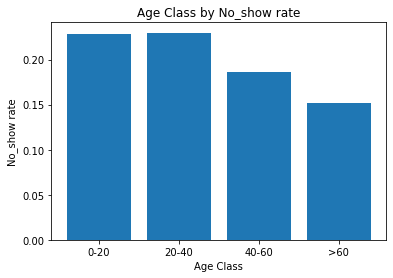

In [34]:
# Create a bar chart with proper labels
locations = [1,2,3,4]
heights = age_class_no_show
labels = ['0-20','20-40','40-60','>60']
plt.bar(locations, heights, tick_label=labels)
plt.title('Age Class by No_show rate')
plt.xlabel('Age Class')
plt.ylabel('No_show rate');

<a id='conclusions'></a>
## Conclusions

> **key observation 1**: Within the no_show group, only small portion of patients doesn't show up in scheduled appointment if he/she joins the scheme of scholarship. It can infer that the scheme of scholarship does encourage people to attain it.

> **key observation 2**: Within the no_show group, people tends to go for medical appointment if they have either diabetes or hipertension. It can infer that those with chronic disease will have higher chance to go for appointment regularly.

> **key observation 3**: Within No_showup group, the more elderly, the less of not showing up in term of percentage within each age group. It can infer that the eldly have regular requirement or behavior to go for medical appointment.

> **key observation 4**: Within No_showup group, both gender and SMS_received have no significant pattern to describe the behaviour of show_up.